### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-21/11/19
#### Clasificacion de RWE-DWT de MI-EEG con CNN
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [2]:
x_train = pd.read_csv("MI-EEG-RWE-A01T.csv", header=None)
x_test = pd.read_csv("MI-EEG-RWE-A01E.csv", header=None)
y_train = pd.read_csv("EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [6]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\EdgarMoises\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 22, 3, 1))
x_test = x_test.reshape((n_samples_test, 22, 3, 1))

print(x_train.shape)
print(x_test.shape)

(288, 22, 3, 1)
(288, 22, 3, 1)


Iteration: 1
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
288/288 [==============================] - 0s 107us/sample - loss: 1.8725 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[39 19  9  5]
 [29 33 10  0]
 [11  2 34 25]
 [ 7  2 28 35]]
(0.5002471778150073, 0.48958333333333337, 0.49117230890747066, None)


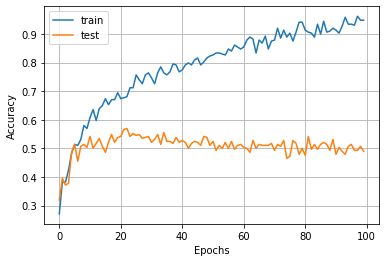

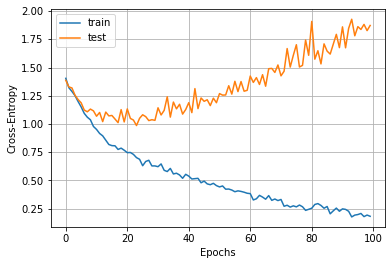

Iteration: 2
288/288 [==============================] - 0s 83us/sample - loss: 1.4401 - acc: 0.5833
kappa:  0.4444444444444444
confusion matrix:
 [[44 18  7  3]
 [19 44  8  1]
 [ 6  1 43 22]
 [ 8  1 26 37]]
(0.5895337301587301, 0.5833333333333334, 0.5842732624513121, None)


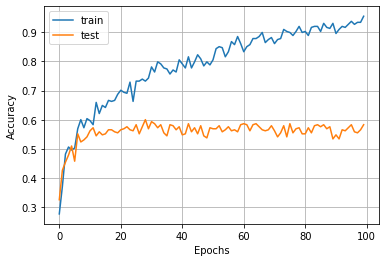

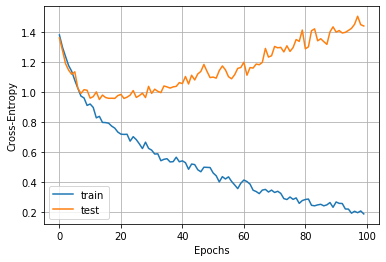

Iteration: 3
288/288 [==============================] - 0s 72us/sample - loss: 1.6593 - acc: 0.5451
kappa:  0.3935185185185185
confusion matrix:
 [[38 27  3  4]
 [18 44  9  1]
 [10  2 37 23]
 [12  1 21 38]]
(0.5465257715257715, 0.5451388888888888, 0.545314447734651, None)


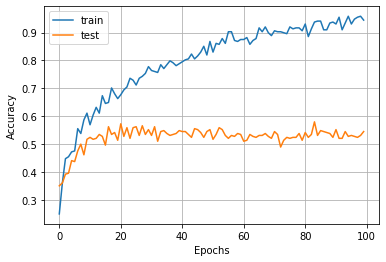

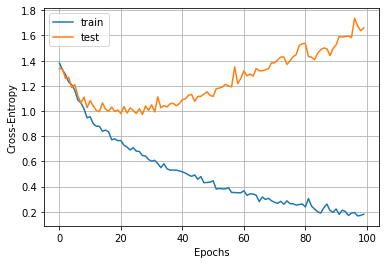

Iteration: 4
288/288 [==============================] - 0s 88us/sample - loss: 2.0372 - acc: 0.4896
kappa:  0.3194444444444444
confusion matrix:
 [[35 27  4  6]
 [21 45  5  1]
 [20  4 27 21]
 [15  2 21 34]]
(0.49590244220974267, 0.48958333333333337, 0.4888787976226728, None)


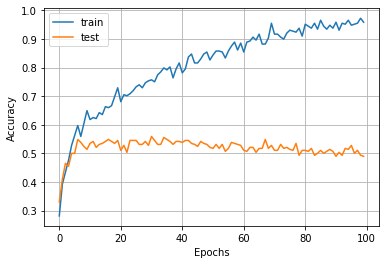

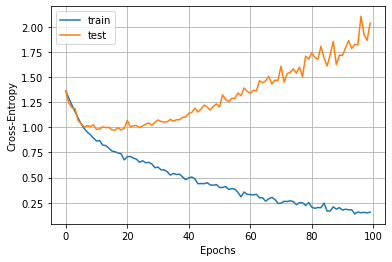

Iteration: 5
288/288 [==============================] - 0s 96us/sample - loss: 2.0508 - acc: 0.4757
kappa:  0.30092592592592593
confusion matrix:
 [[41 19  6  6]
 [28 34 10  0]
 [11  3 22 36]
 [ 9  1 22 40]]
(0.4779092325222484, 0.4756944444444444, 0.4723156014864811, None)


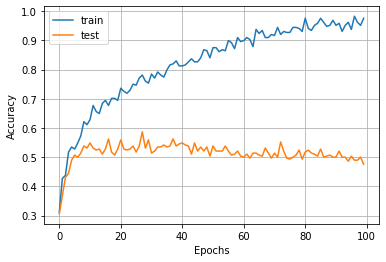

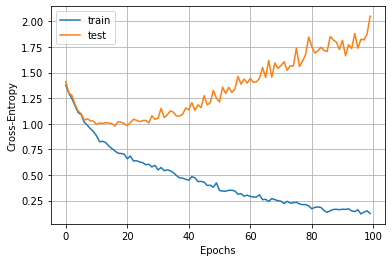

Iteration: 6
288/288 [==============================] - 0s 84us/sample - loss: 1.6934 - acc: 0.5347
kappa:  0.37962962962962965
confusion matrix:
 [[39 23  5  5]
 [18 44 10  0]
 [ 7  2 42 21]
 [ 7  2 34 29]]
(0.5394563183295578, 0.5347222222222222, 0.5332173743844678, None)


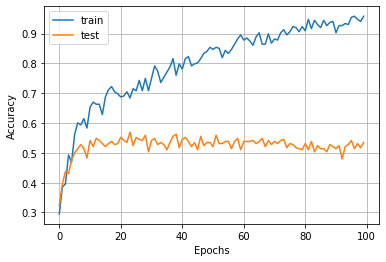

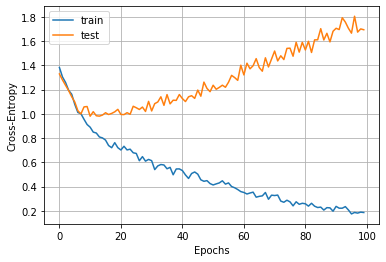

Iteration: 7
288/288 [==============================] - 0s 97us/sample - loss: 1.5977 - acc: 0.5035
kappa:  0.3379629629629629
confusion matrix:
 [[46 17  3  6]
 [29 32 10  1]
 [11  2 31 28]
 [11  1 24 36]]
(0.5131340064926575, 0.5034722222222222, 0.5017153442091408, None)


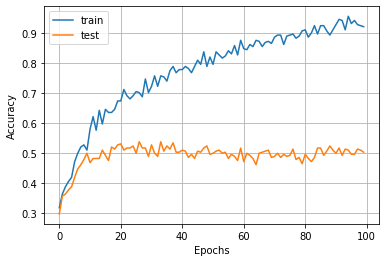

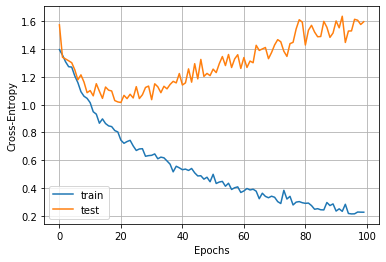

Iteration: 8
288/288 [==============================] - 0s 121us/sample - loss: 1.5509 - acc: 0.5347
kappa:  0.37962962962962965
confusion matrix:
 [[38 24  5  5]
 [21 44  6  1]
 [ 6  4 36 26]
 [ 7  2 27 36]]
(0.5345676558911853, 0.5347222222222222, 0.5344884757555991, None)


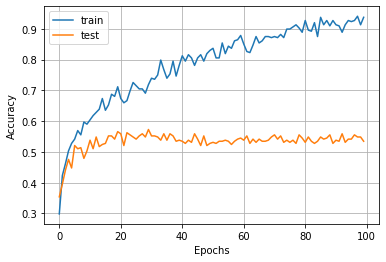

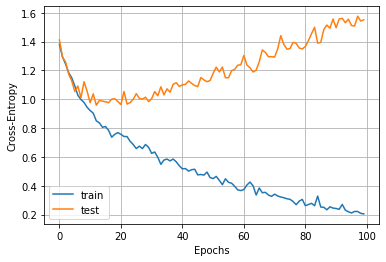

Iteration: 9
288/288 [==============================] - 0s 83us/sample - loss: 1.8142 - acc: 0.5382
kappa:  0.3842592592592593
confusion matrix:
 [[30 30  5  7]
 [13 51  7  1]
 [ 4  4 31 33]
 [ 5  2 22 43]]
(0.5379894530756599, 0.5381944444444444, 0.5323042993779495, None)


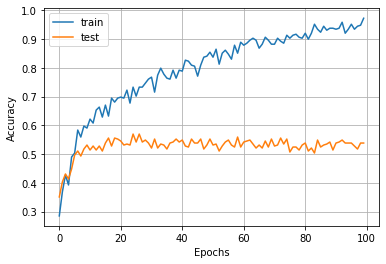

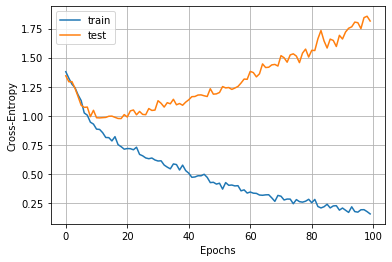

Iteration: 10
288/288 [==============================] - 0s 90us/sample - loss: 1.6258 - acc: 0.5590
kappa:  0.4120370370370371
confusion matrix:
 [[35 24  7  6]
 [16 47  9  0]
 [ 4  2 51 15]
 [ 4  3 37 28]]
(0.5683636446069542, 0.5590277777777778, 0.5529604130185324, None)


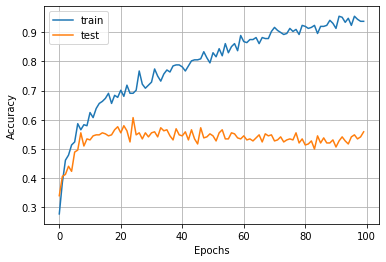

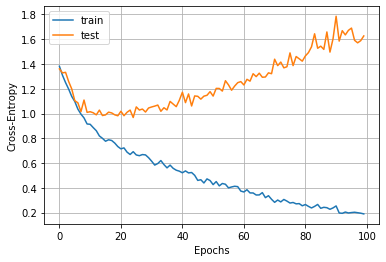


Resultados:
loss: [1.8725464741388957, 1.4400586022271051, 1.6592522197299533, 2.0371629529529147, 2.050751209259033, 1.6933633883794148, 1.5976513889100816, 1.5508792930179172, 1.8141669829686482, 1.6258478826946683]
accuracy: [0.48958334, 0.5833333, 0.5451389, 0.48958334, 0.47569445, 0.5347222, 0.5034722, 0.5347222, 0.5381944, 0.5590278]
kappa: [0.3194444444444444, 0.4444444444444444, 0.3935185185185185, 0.3194444444444444, 0.30092592592592593, 0.37962962962962965, 0.3379629629629629, 0.37962962962962965, 0.3842592592592593, 0.4120370370370371]
precision: [0.5002471778150073, 0.5895337301587301, 0.5465257715257715, 0.49590244220974267, 0.4779092325222484, 0.5394563183295578, 0.5131340064926575, 0.5345676558911853, 0.5379894530756599, 0.5683636446069542]
recall: [0.48958333333333337, 0.5833333333333334, 0.5451388888888888, 0.48958333333333337, 0.4756944444444444, 0.5347222222222222, 0.5034722222222222, 0.5347222222222222, 0.5381944444444444, 0.5590277777777778]
f1: [0.491172308907470

In [9]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(22,3,1)))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 20, 1, 32)         320       
_________________________________________________________________
flatten_9 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                20512     
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 132       
Total params: 20,964
Trainable params: 20,964
Non-trainable params: 0
_________________________________________________________________


In [11]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.5253
std: (+/- 0.0328)
kappa: 0.3671
precision: 0.5304
recall: 0.5253
f1: 0.5237
